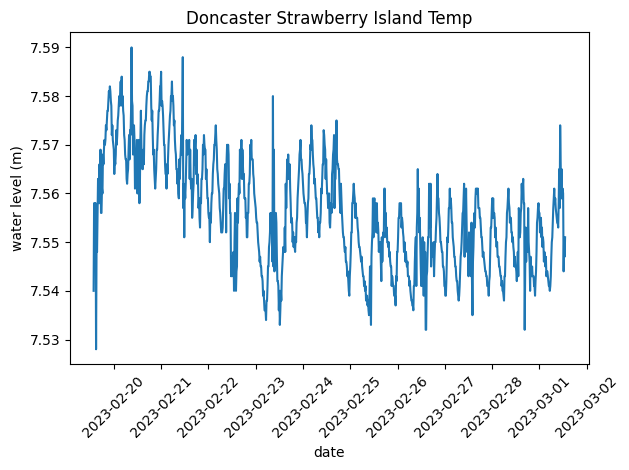

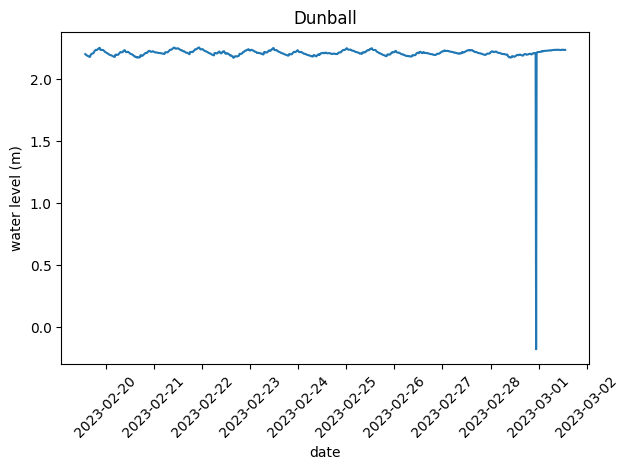

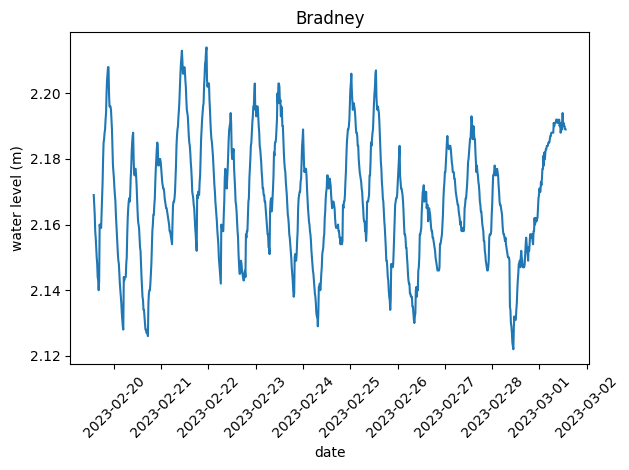

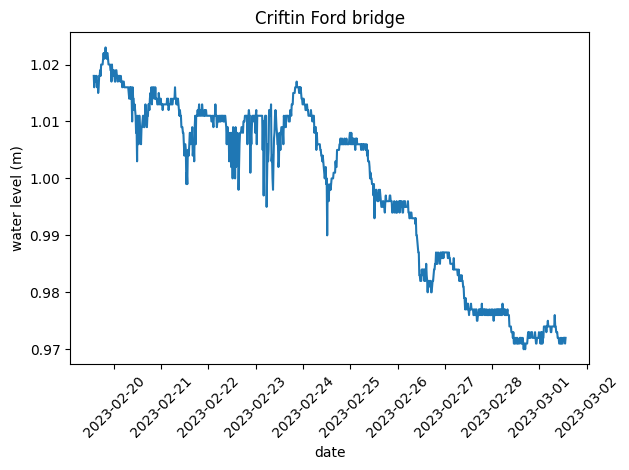

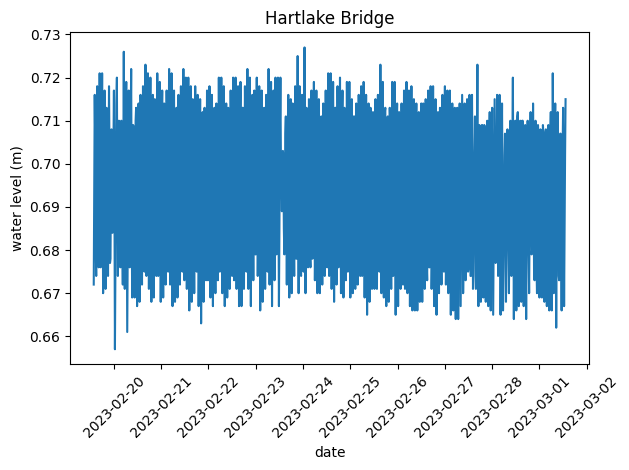

In [1]:
import datetime
from floodsystem.stationdata import build_station_list, update_water_levels
from floodsystem.datafetcher import fetch_measure_levels
from floodsystem.plot import plot_water_levels

def run():
    stations = build_station_list()
    update_water_levels(stations)

    N = len(stations)
    while N > 0:
        for i in range(N - 1):
            a1 = stations[i].latest_level
            a2 = stations[i + 1].latest_level
            if type(a1) == float and type(a2) == float:
                if a1 > a2:
                    stations[i + 1], stations[i] = stations[i], stations[i + 1]
            else:
                pass
                    
        N = N - 1
    datesum = []
    levelsum = []
    dt = 10
    for n in range(1,6):
        dates, levels = fetch_measure_levels(stations[-n].measure_id,dt=datetime.timedelta(days=dt))
        datesum.append(dates)
        levelsum.append(levels)
        plot_water_levels(stations[-n],datesum[n-1],levelsum[n-1])
    
if __name__ == "__main__":
    run()
    
